# **E-commerce Sentiment Analysis: Jumia Kenya**
## **Overview**
This project evaluates whether customer reviews on Jumia Kenya align with the star ratings provided by buyers. I scraped real customer reviews from the Jumia platform, cleaned the text, performed sentiment analysis using NLP techniques, and built machine learning models to classify review sentiment. The goal is to check if star ratings are trustworthy and whether written reviews match the sentiment implied by the rating.

## **Business Understanding**
### Background

E-commerce is steadily climbing the ranks to become one of Kenya’s key economic pillars. As more sellers move away from traditional brick-and-mortar setups, where success relied on foot traffic and physical presence, many are embracing digital trade. Today, all a seller needs is a smartphone, an internet connection, and a platform to post their products. No rent, no storefront, just opportunity at their fingertips.

But with this rapid growth comes rising competition.

To stand out, some sellers have resorted to questionable tactics, most notably purchasing fake or misleading reviews to boost visibility and increase sales. As a result, many shoppers are beginning to question whether the reviews they see are genuine, and whether the written feedback actually aligns with the star ratings shown on platforms like Jumia. In an online world where customer trust is everything, these practices threaten the very foundation of e-commerce.

## **Project Statement and Objectives**
### Problem Statement

In Kenya, entrepreneurs of all ages rely on platforms like Jumia, Kilimall, Jiji, and PigiaMe not just to grow businesses, but to survive.

As the number of vendors grow, so does the pressure to stand out. There have been numerous reports—like [this one from CloudSek](https://www.cloudsek.com/blog/fake-reviews-ecommerce-scam-manipulation) and [this LinkedIn article](https://www.linkedin.com/pulse/fake-reviews-e-commerce-platform-how-companies-tackling-singh), revealing how fake reviews are being used to manipulate buyer perception and game platform algorithms.

This creates an unfair playing field as:
- Genuine sellers get buried in search results while review-stuffed products dominate.

- Honest products with real value go unseen simply because they lack inflated feedback.

- Trust erodes, for buyers and sellers alike.

If left unchecked, this trend could hurt not just individual vendors but the credibility of the platforms themselves as well as the consumers.

### Project Objectives
This project seeks to:
- Scrape and analyze real customer reviews from Jumia Kenya

- Use Natural Language Processing (NLP) and sentiment analysis to assess whether star ratings align with the tone of customer feedback

- Identify mismatches between what customers *say* and how they *rate*

- Surface products where ratings may not reflect reality, and uncover hidden insights from genuine sentiment.


By doing this, we aim to provide a tool that can help platforms:

- Promote visibility based on actual customer satisfaction

- Flag suspicious rating behaviors

- Empower buyers to make better-informed decisions

### Success Criteria
This project will be considered successful if it:
- Accurately identifies inconsistencies between star ratings and review sentiment

- Surfaces products where true customer experience may be misrepresented

- Helps create a fairer visibility system based on authentic feedback

- Empowers platforms to protect honest vendors and build trust with buyers

### Stakeholders
- *Customers:* Individuals purchasing goods on platforms like Jumia

- *Sellers/Merchants:* Businesses listing products and relying on fair visibility

- *Platform Providers:* Companies managing and maintaining the e-commerce space

- *Regulatory Bodies:* Institutions overseeing digital commerce and consumer protection

- *Investors:* Backers of the platforms with a vested interest in ethical growth

- *Government & Development Partners:* Working to ensure e-commerce remains a stable and trustworthy engine for local economies

### Project Plan Overview
- Data Collection  
- Data Cleaning & Preparation  
- Sentiment Analysis  
- Exploratory Data Analysis  
- Visualizations & Reporting

## **Data Understanding.**
### Data Collection (Web Scraping)
The data used in this project was collected from publicly accessible product pages on `Jumia Kenya` using web scraping techniques. Reviews were gathered from selected products in three categories: fashion, appliances, and other electronics.

The scraping was performed using Python libraries such as requests and BeautifulSoup as evident in the `Scraper` folder, and all information collected is visible to any user visiting the site. No login or bypassing of protections was required.

We extracted the following assets:
- Product name

- Category

- Review title

- Review text

- Star rating

- Review date

- Verified purchase (if available)

A total of 362 reviews were scraped across multiple product categories.

This data was collected strictly for educational and research purposes, with the intent of exploring the relationship between product star ratings and actual customer sentiment. It is not affiliated with, endorsed by, or intended to defame Jumia or any of its sellers. It simply aims to uncover insights from publicly available information and promote transparency in digital marketplaces.

The dataset is under the file path `Data/`.

### Why is the data suitable for this project?
Jumia Kenya is one of the most popular e-commerce platforms in Kenya, data from the platform not only provides a larger pool of sellers but also a richer variety of reviews which allows for a more comprehensive understanding of consumer behavior.

- The largest e-commerce companies have millions or even billions of transactions, providing a vast dataset to analyze. This allows for more robust statistical analysis and reduces the chance of drawing inaccurate conclusions based on limited data.

- Large companies also serve a diverse customer base, including demographics, geographic locations, and purchasing habits. This diverse data helps in identifying patterns that might be missed in smaller datasets focused on specific niches.

### Exploring the dataset for understanding.
In this section we will be carrying out both qualitative and quantitative analysis to understand the structure of the dataset as well as identify areas that would impact our analysis if left unchecked or simply not fixed.

#### Import dependencies and loading the dataset.
In this section we will be importing our dependencies that we will be using all through the project for our data cleaning, exploratory data analysis, NPL etc. We will also be loading the scraped dataset.

We are loading the dataset using pandas `.read_csv()` method.


In [1]:
# Import dependencies.
import re
import nltk
import pandas as pd
import seaborn as sns
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the dataset.
reviews = pd.read_csv('../Data/Raw/jumia_reviews.csv')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### Qualitative Analysis.
Before our analysis, we will explore our data, to understand its structure and what it contains. We will also be looking at the contenet and making sure it is in good quality for analysis.

We will use the .head() method to access the first 5 rows of the data. This will help us understand what columns we have and what type of values they contain.

In [2]:
# Dataset preview.
reviews.head()

,product_name,category,review_title,review_text,rating,review_date,verified
0,Berrykey Hawaiian Shirt,fashion,big size not cotton,Not cotton,1,19-06-2025,Verified Purchase
1,Berrykey Hawaiian Shirt,fashion,Not satisfied,The material is bad.not what I expected,1,13-06-2025,Verified Purchase
2,Berrykey Hawaiian Shirt,fashion,I like it,It is okay,5,12-05-2025,Verified Purchase
3,Berrykey Hawaiian Shirt,fashion,I like it,The quality is good. It's worth the price,5,22-04-2025,Verified Purchase
4,Berrykey Hawaiian Shirt,fashion,good,Good,5,27-01-2025,Verified Purchase


From the output above, the data has 7 columns and it contains review data of products. To further explore the dataset's structure, we will use pandas .info() method. This method will give us the concise summary of our data, providing us with infomation on the number of rows and columns, number of non-null values, and the columns' datatype. 

In [3]:
# Get dataset's qualitative summary
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  362 non-null    object
 1   category      362 non-null    object
 2   review_title  362 non-null    object
 3   review_text   362 non-null    object
 4   rating        362 non-null    int64 
 5   review_date   362 non-null    object
 6   verified      362 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.9+ KB


The dataset contains data stored in 362 rows in columns named product_name, category, review_title, review_text, rating, review_date and verified. Out of the 7 columns, only 1 is stored as an integer and the rest are stored as objects. Additionally, the data seems to have no null values.

Next we are ensuring the data has no null values and also looking if our data has duplicate records. We are using pandas .isnull() and .duplicated() methods. This is a crucial step as duplicates or null values impact the quality, accuracy, and reliability of your data, and lead to inaccurate results in your analysis.

In [4]:
# Check for null values
reviews.isnull().sum()

product_name    0
category        0
review_title    0
review_text     0
rating          0
review_date     0
verified        0
dtype: int64

In [5]:
# Check for duplicated records.
print(f'The reviews dataset contains {reviews.duplicated().sum()} duplicated record.')

The reviews dataset contains 1 duplicated record.


The datast contains no null values but has 1 duplicated record.

#### Quantitative Analysis.
Here we will be getting the dataset's qualitative summary using the .describe() method. This method generates descriptive statistics, giving summarized statistical description of your data's measures of central tendecy, mean, mode, median, and percentiles as well as measures of spread, standard deviation.

In [6]:
# Get dataset's statistical summary.
reviews.describe()

,rating
count,362.000000
mean,4.204420
std,1.205795
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


A lot of ratings in the dataset are positive, the mean of the ratings is 4.20 and the 25th percentile is 4.0.

#### Data Quality Issues.
Data quality issues, are characterized by inaccuracies, incompleteness, and inconsistencies, these issues, if left unchecked/unsolved, can severely impact our analysis by leading to flawed analysis, poor decision-making, among other problems.

Our data understanding section has helped us identfy some of the issues in the dataset including;
- Inaccuracies - most of the columns in the dataset are stored as objects when they dates.

- Duplicates - we found one duplicated record in the dataset.

Addressing these problems is crucial for maintaining data integrity and ensuring reliable results across all business operations. In the next section, we will be cleaning the data and preparing it for analysis.

## **Data Cleaning**
In the previous section, we identified some quality issues in our dataset. In this section, we will be dealing with the quality issues by cleaning the data and ensuring it is reliable for the next sections.

Here we will be preparing our data for analysis, this process will include:
- Dropping duplicate records.

- Reformatting some columns.

- Column engineering.

- Standardization.

In the first part, we will be dropping the duplicate record we identified in the `Data Understanding` section using the `.drop_duplicates()` method. As mentioned earlier, this is an important step as duplicates could lead to unreliable or skewed analysis.

In [7]:
# Drop duplicate records.
reviews.drop_duplicates(inplace= True)

# Verify duplicate records are dropped.
print(f'The reviews dataset contains {reviews.duplicated().sum()} duplicated records.')

The reviews dataset contains 0 duplicated records.


Next we wil be converting the `rating` and `review_date` columns from integer and object to float and datetime respectively. We will use the `.astype()` and `.to_datetime()` methods for the columns respectively. Storing data in the correct data type is crucial for accuracy, efficiency, and proper functionality. 

Here, we convert `rating` to float so we can compute averages and convert `review_date` to datetime to enable sorting and analyzing reviews over time.

In [8]:
# Convert `review_date` to a datetime datatype.
reviews['review_date'] = pd.to_datetime(reviews['review_date'], errors= 'coerce', dayfirst= True)

# Convert rating to float
reviews['rating'] = reviews['rating'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

# Verify columns have been converted.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361 entries, 0 to 361
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   product_name  361 non-null    object        
 1   category      361 non-null    object        
 2   review_title  361 non-null    object        
 3   review_text   361 non-null    object        
 4   rating        361 non-null    float64       
 5   review_date   361 non-null    datetime64[ns]
 6   verified      361 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 22.6+ KB


In the next code we are mapping the `verified` columns and changing the values to either 'yes' or 'no'. This is so as to keep the values short and clear as well as understandable. We are using the .map() method to apply a fuction to each element and the lambda function to iterate over each element. 

In [9]:
# Change the `verified` column values to either yes or no.
reviews['verified'] = reviews['verified'].map(lambda x: 'yes' if x == 'Verified Purchase' else 'no')

# Verify change.
reviews['verified'].head()

0    yes
1    yes
2    yes
3    yes
4    yes
Name: verified, dtype: object

Next we are dropping null values from the `review_text` column.

In [10]:
reviews = reviews.dropna(subset=['review_text'])
reviews = reviews[reviews['review_text'].str.strip() != ""]

In [11]:
# Preview the changes.
reviews.head()

,product_name,category,review_title,review_text,rating,review_date,verified
0,Berrykey Hawaiian Shirt,fashion,big size not cotton,Not cotton,1.0,2025-06-19,yes
1,Berrykey Hawaiian Shirt,fashion,Not satisfied,The material is bad.not what I expected,1.0,2025-06-13,yes
2,Berrykey Hawaiian Shirt,fashion,I like it,It is okay,5.0,2025-05-12,yes
3,Berrykey Hawaiian Shirt,fashion,I like it,The quality is good. It's worth the price,5.0,2025-04-22,yes
4,Berrykey Hawaiian Shirt,fashion,good,Good,5.0,2025-01-27,yes


In [12]:
# Saving final dataset for Power BI dashboard.
reviews.to_csv('../Data/CleanedData/cleaned_jumia_reviews_dataset.csv', index= False)

At this point we have cleaned the data and it is ready for EDA.

## **Exploratory Data Analysis (EDA)**
In this section we will be doing exploratory data analysis, this is crucial for our analysis later as it helps us understand te shape and pattern of our data. It also helps us uncover patterns, or biases in our data.We will be using seaborn and matplotlib python modules for visualization

### Rating Distribution.
We are trying to understand the shape of the ratings in the dataset. Earlier we saw that the mean was `4.20`, this could mean that it is biased or otherwise, visualizing it could help us understand it better.

In [13]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

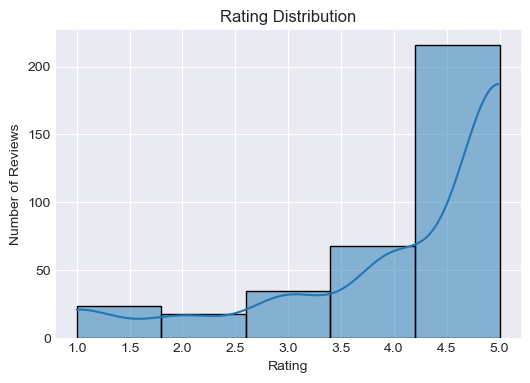

In [14]:
# set style
plt.style.use('seaborn-v0_8-darkgrid')

# Plot Rating Distribution.
plt.figure(figsize=(6,4))
sns.histplot(reviews['rating'], bins= 5, kde= True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

The dataset contains a lot of 5 ratings, it may prove that the data is biased. However, according to [gominga's Online Review Statistics 2024](https://gominga.com/insights/online-review-statistics), 96% of dissatisfied customers won't bother to leave a bad review, which could explain why the negative reviews are in small numbers. But the same study also says that customers are 21% more likely to leave a review after a negative experience than after a positive experience.

In conclusion, this may represent genuine customer satisfaction or something else.

### Average rating by Category.
The plot above shows that most products have been rated 5, here we are going to plot average ratings by categories, this will help us identify which product categories have the most positive rates.

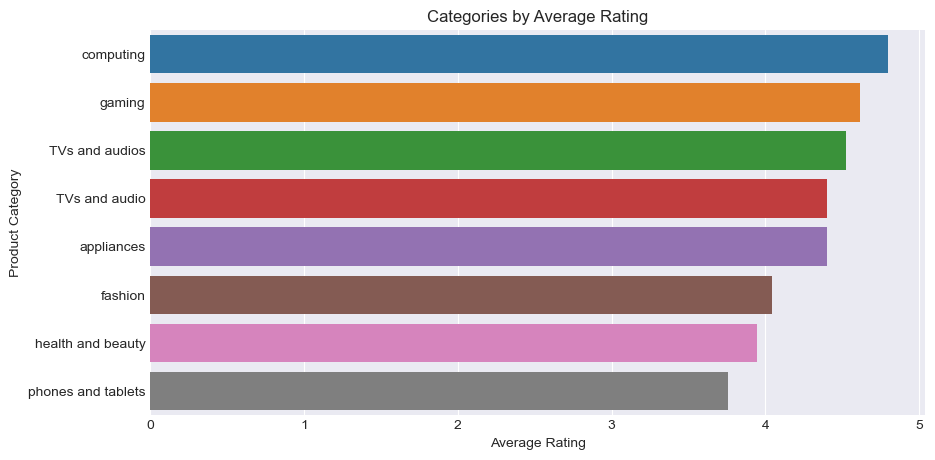

In [15]:
# Plot Average Rating per Category.
avg_rating = reviews.groupby('category')['rating'].mean().sort_values(ascending= False)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_rating.values, y=avg_rating.index, hue= avg_rating.index, legend= False)
plt.title('Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Product Category')
plt.show()

Electronics like computing and gaming devices, tvs and audios and appliances have the most positive review ratings standing at more than 4 stars.

### Average ratings per product.
We have found that electronics have the most positive review ratings per product categories, here we will explore products with the highest ratings and figure what categories they fall in.

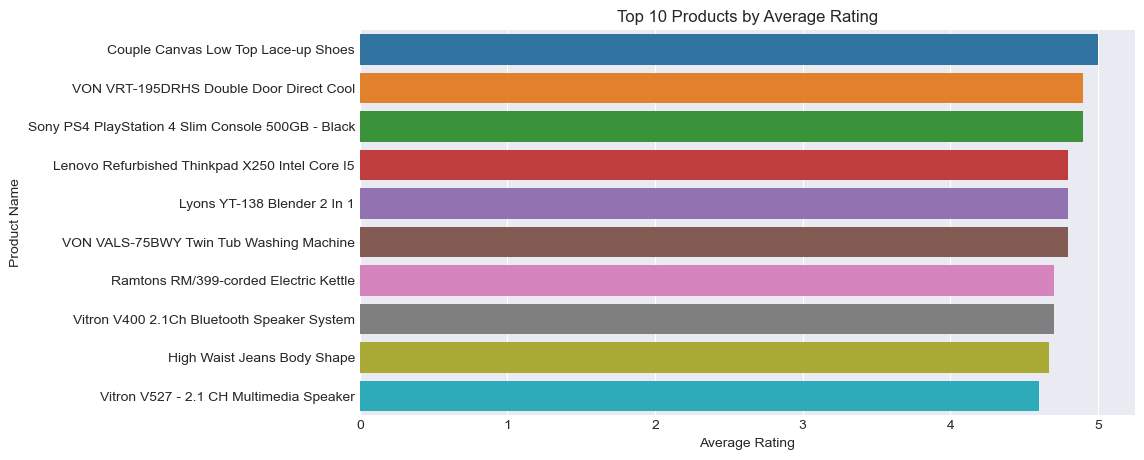

In [16]:
# Plot Average Ratings per Product.
avg_rating = reviews.groupby('product_name')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_rating.values, y=avg_rating.index, hue=avg_rating.index, legend= False)
plt.title('Top 10 Products by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.show()

Despite fashion ranking the 5th category with the highest review ratings, one of its product ranks the product with the highest review ratings. Electronics however, still dominate the products with the highest review ratings.

### Reviews per product.
Next we are looking at the top 10 products with the most reviews in the dataset.

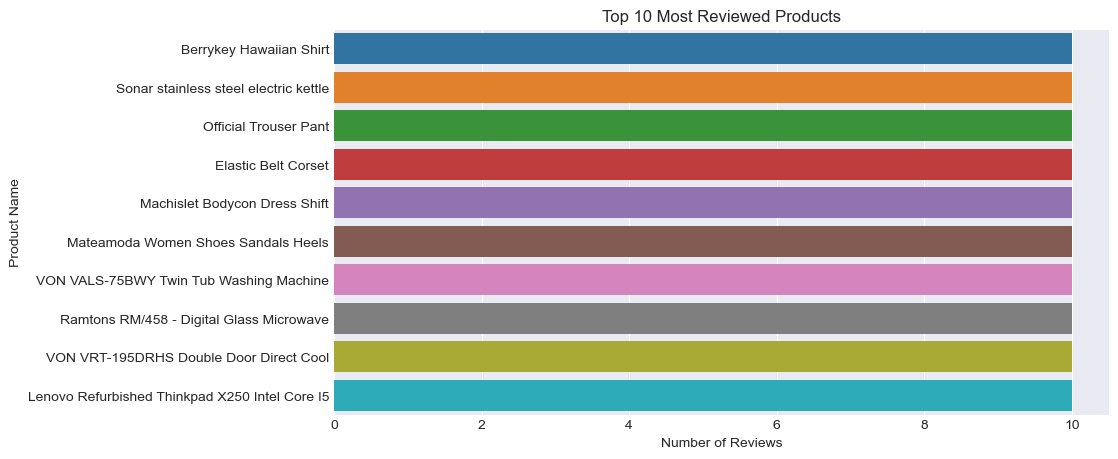

In [17]:
# Plot Reviews per Product.
plt.figure(figsize=(10,5))
top_products = reviews['product_name'].value_counts().nlargest(10)
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, legend= False)
plt.title('Top 10 Most Reviewed Products')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Name')
plt.show()

Most products have about 10 reviews each.

### Verified vs Unverified.
We are exploring the `verified` column to identify if there are any reviews from unverified purchasers and mostly confirm if the reviews we scraped  are from verified purchases.

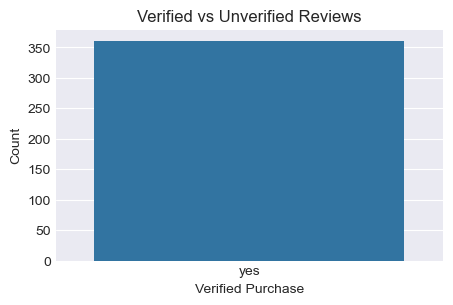

In [18]:
# Plot Verified vs Unverified.
plt.figure(figsize=(5,3))
sns.countplot(data=reviews, x='verified', hue= 'verified', legend= False)
plt.title('Verified vs Unverified Reviews')
plt.xlabel('Verified Purchase')
plt.ylabel('Count')
plt.show()

All the reviews in the dataset are from verified purchases. Verified reviews, those from customers who have actually purchased a product or service, are crucial because they offer increased trust and credibility compared to unverified reviews.

### Review Length.
As we mentioned earlier, for accurate representation and context, it is essential to have a number of words, we are exploring the distribution of number of words in the `review_text` column.

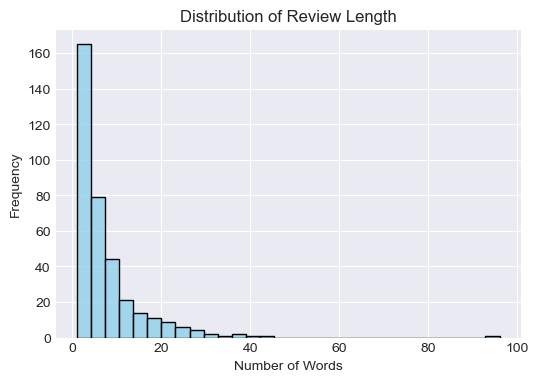

In [19]:
# Prepare data for plotting.
reviews['review_length'] = reviews['review_text'].str.split().apply(len)

# Plot Review Length.
plt.figure(figsize=(6,4))
sns.histplot(reviews['review_length'], bins=30, color='skyblue')
plt.title('Distribution of Review Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

Most of the number of words in the column range from 1 to around 40. We also have 1 review that has more than 90 words.

## **Sentiment Analysis: Natural Language Processing (NLP)**
To this point, we have carried out general data cleaning and exploration, but now, in this section, we are using NLP to carry out sentiment analysis.

### *TextBlob*
#### Clean the reviews
Here we are cleaning the dataset and preparing it for sentiment analysis using TextBlob.

In the first part we are:
- Turning everything to lowercase

- Removing punctuation, numbers, and stop words

- Lemmatizing

- Tokenizing

In [20]:
# Setting stopwords and instantiating lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define a function to clean the review_text column
def clean_text(text):

    # Lowercase
    text = text.lower()
    
    # Replace punctuation with space
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # Remove numbers
    text = re.sub(r'\d+', ' ', text)
    
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords & lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Reconstruct
    cleaned = " ".join(tokens)
    
    return cleaned

In [21]:
# Clean the column using the function
reviews['clean_review'] = reviews['review_text'].astype(str).apply(clean_text)

In [22]:
# Preview the dataset
reviews.head(10)

,product_name,category,review_title,review_text,rating,review_date,verified,review_length,clean_review
0,Berrykey Hawaiian Shirt,fashion,big size not cotton,Not cotton,1.0,2025-06-19,yes,2,cotton
1,Berrykey Hawaiian Shirt,fashion,Not satisfied,The material is bad.not what I expected,1.0,2025-06-13,yes,7,material bad expected
2,Berrykey Hawaiian Shirt,fashion,I like it,It is okay,5.0,2025-05-12,yes,3,okay
3,Berrykey Hawaiian Shirt,fashion,I like it,The quality is good. It's worth the price,5.0,2025-04-22,yes,8,quality good worth price
4,Berrykey Hawaiian Shirt,fashion,good,Good,5.0,2025-01-27,yes,1,good
5,Berrykey Hawaiian Shirt,fashion,quality of the fabric is poor,The size is extra big for the small size..then...,2.0,2024-10-03,yes,13,size extra big small size use better quality m...
6,Berrykey Hawaiian Shirt,fashion,"size ,material",Nice and well prepared,5.0,2024-09-17,yes,4,nice well prepared
7,Berrykey Hawaiian Shirt,fashion,Shirt,Good material but take a smaller size,5.0,2024-09-06,yes,7,good material take smaller size
8,Berrykey Hawaiian Shirt,fashion,ok,Ok,3.0,2024-08-09,yes,1,ok
9,Berrykey Hawaiian Shirt,fashion,shirt,It's nice,5.0,2024-07-22,yes,2,nice


We have cleaned the dataset with focus on removing stop words to help the ML model interpret the tone of the review better.

#### Applying TextBlob
Next we are using TextBlob to help us come up with sentiment labels for our reviews using the cleaned review texts.

In [23]:
# Define function to calculate polarity
def get_sentiment_label(text):
    polarity = TextBlob(text).sentiment.polarity
    
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Add sentiment label column to the data
reviews['sentiment_label'] = reviews['clean_review'].apply(get_sentiment_label)

# Verify
reviews['sentiment_label'].value_counts()

sentiment_label
positive    230
neutral      91
negative     40
Name: count, dtype: int64

In our EDA we uncovered that positive reviews are more than the negative reviews, the value count above proves that the sentiment labels align with this finding. To investigate further we are plotting the sentiment labels counts against the rating sentiments to see if the disparity is huge if there is any.

#### TextBlob sentiments vs Ratings based sentiments

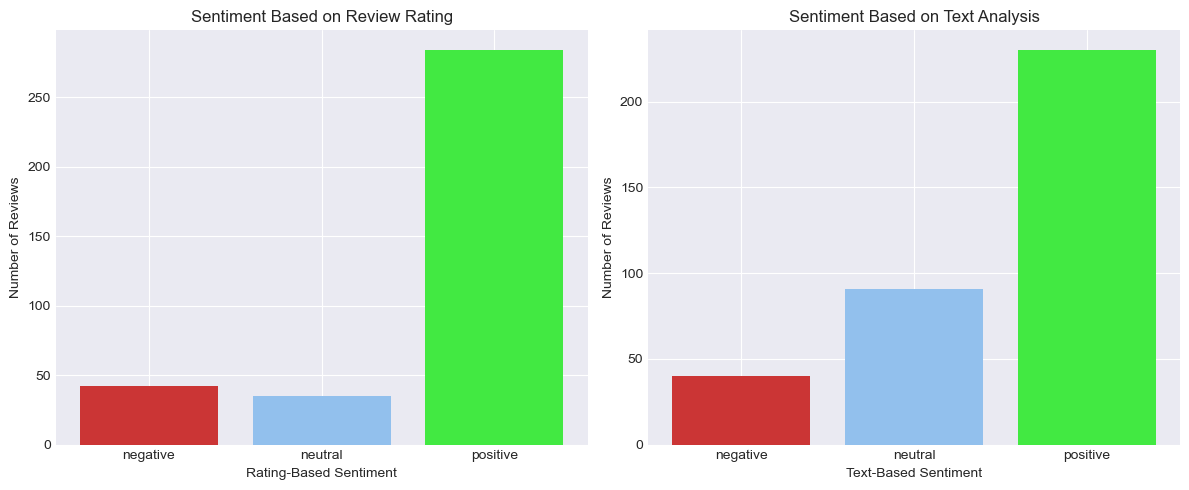

In [24]:
# Map ratings to sentiment
def rating_to_sentiment(rating):
    if rating in [1, 2]:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    elif rating in [4, 5]:
        return 'positive'

reviews['rating_sentiment'] = reviews['rating'].apply(rating_to_sentiment)

# Count values
rating_counts = reviews['rating_sentiment'].value_counts().sort_index()
sentiment_counts = reviews['sentiment_label'].value_counts().sort_index()

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Rating-based sentiment plot
axes[0].bar(rating_counts.index, rating_counts.values, color=["#cb3535","#92c0ed","#42e942"])
axes[0].set_title('Sentiment Based on Review Rating')
axes[0].set_xlabel('Rating-Based Sentiment')
axes[0].set_ylabel('Number of Reviews')

# NLP sentiment plot
axes[1].bar(sentiment_counts.index, sentiment_counts.values, color=["#cb3535",'#92c0ed','#42e942'])
axes[1].set_title('Sentiment Based on Text Analysis')
axes[1].set_xlabel('Text-Based Sentiment')
axes[1].set_ylabel('Number of Reviews')

plt.tight_layout()
plt.show()

The above plots show that the rating based sentiments are mostly consistent with the text-based sentiments, positive sentiments remain consistent, however, there are some mismatches in the neutral and negative sentiments. 

The mismatch is as a result of the ratings proving that the model looked beyond the stars and tried to understand the emotional tone behind the review text.

To help understand the mismatches, we are going to review the first 15 rows to manually see if the polarity scores were accurate or otherwise.

In [25]:
# Preview the dataset
reviews.head(15)

,product_name,category,review_title,review_text,rating,review_date,verified,review_length,clean_review,sentiment_label,rating_sentiment
0,Berrykey Hawaiian Shirt,fashion,big size not cotton,Not cotton,1.0,2025-06-19,yes,2,cotton,neutral,negative
1,Berrykey Hawaiian Shirt,fashion,Not satisfied,The material is bad.not what I expected,1.0,2025-06-13,yes,7,material bad expected,negative,negative
2,Berrykey Hawaiian Shirt,fashion,I like it,It is okay,5.0,2025-05-12,yes,3,okay,positive,positive
3,Berrykey Hawaiian Shirt,fashion,I like it,The quality is good. It's worth the price,5.0,2025-04-22,yes,8,quality good worth price,positive,positive
4,Berrykey Hawaiian Shirt,fashion,good,Good,5.0,2025-01-27,yes,1,good,positive,positive
5,Berrykey Hawaiian Shirt,fashion,quality of the fabric is poor,The size is extra big for the small size..then...,2.0,2024-10-03,yes,13,size extra big small size use better quality m...,positive,negative
6,Berrykey Hawaiian Shirt,fashion,"size ,material",Nice and well prepared,5.0,2024-09-17,yes,4,nice well prepared,positive,positive
7,Berrykey Hawaiian Shirt,fashion,Shirt,Good material but take a smaller size,5.0,2024-09-06,yes,7,good material take smaller size,positive,positive
8,Berrykey Hawaiian Shirt,fashion,ok,Ok,3.0,2024-08-09,yes,1,ok,positive,neutral
9,Berrykey Hawaiian Shirt,fashion,shirt,It's nice,5.0,2024-07-22,yes,2,nice,positive,positive


For the most part, the polarity score has interpreted the reviews correctly, except for some, for example;
- row 0 - the review is negative, the rating is 1, meaning that it was a negative review. owever, because `not` is a stopword, it was removed and the TextBlob only used `cotton` to interpret.

- row 5 - the sentiment label is positive whereas the rating is 2, meaning that this review was flagged as negative by the customer.

### *VADER*
To help deal with this problem, we are going to first combine review_title and review_text to give more context, giving us richer material to work with. Next, we are going to use Valence Aware Dictionary for Sentiment Reasoning (VADER), a sentiment analysis tool that uses a lexicon and rules to determine the emotional tone of a piece of text. It is particularly effective for social media content because it accounts for slang, emoticons, and punctuation, and it provides a compound score indicating overall sentiment, along with positive, negative, and neutral scores.

#### Combine review_title and review_text
Here we are combining review_title and review_text to give us more context and richer material to work with.

In [26]:
# Filter data to remain with relevant columns
vader_data = pd.DataFrame(reviews[['product_name', 'category', 'review_title', 'review_text', 'rating',
       'review_date', 'verified']])

# Preview changes
vader_data.head()

,product_name,category,review_title,review_text,rating,review_date,verified
0,Berrykey Hawaiian Shirt,fashion,big size not cotton,Not cotton,1.0,2025-06-19,yes
1,Berrykey Hawaiian Shirt,fashion,Not satisfied,The material is bad.not what I expected,1.0,2025-06-13,yes
2,Berrykey Hawaiian Shirt,fashion,I like it,It is okay,5.0,2025-05-12,yes
3,Berrykey Hawaiian Shirt,fashion,I like it,The quality is good. It's worth the price,5.0,2025-04-22,yes
4,Berrykey Hawaiian Shirt,fashion,good,Good,5.0,2025-01-27,yes


In [27]:
# Create a new column "full_review" by combining title + review
vader_data['full_review'] = vader_data['review_title'].fillna('') + ' ' + vader_data['review_text'].fillna('')
vader_data['full_review'] = vader_data['full_review'].str.strip()

#### Clean the data
VADER uses a lexicon and rules to determine the emotional tone of a piece of text, that means that it uses punctuations, capitalization among other grammatical rules to interpret thne sentiments of a text. Therefore in our cleaning, we ware only removing spaces from the combined texts and leaving everything else as is.

In [28]:
# Define function to clean reviews
def vader_clean(text):
    '''This function only cleans spaces because VADER uses punctuations 
    and capital letters to interpret the sentiments.'''
    if pd.isna(text):
        return ""
    
    text = text.replace("\n", " ").replace("\r", " ")
    return text.strip()

In [29]:
# Clean reviews
vader_data['clean_review'] = vader_data['full_review'].apply(vader_clean)

# Preview the changes
vader_data.head()

,product_name,category,review_title,review_text,rating,review_date,verified,full_review,clean_review
0,Berrykey Hawaiian Shirt,fashion,big size not cotton,Not cotton,1.0,2025-06-19,yes,big size not cotton Not cotton,big size not cotton Not cotton
1,Berrykey Hawaiian Shirt,fashion,Not satisfied,The material is bad.not what I expected,1.0,2025-06-13,yes,Not satisfied The material is bad.not what I e...,Not satisfied The material is bad.not what I e...
2,Berrykey Hawaiian Shirt,fashion,I like it,It is okay,5.0,2025-05-12,yes,I like it It is okay,I like it It is okay
3,Berrykey Hawaiian Shirt,fashion,I like it,The quality is good. It's worth the price,5.0,2025-04-22,yes,I like it The quality is good. It's worth the ...,I like it The quality is good. It's worth the ...
4,Berrykey Hawaiian Shirt,fashion,good,Good,5.0,2025-01-27,yes,good Good,good Good


#### Applying VADER
Next we are applying VADER to the cleaned texts to get their sentiments.

In [30]:
# Instantiate VADER
vader = SentimentIntensityAnalyzer()

# Apply VADER
vader_data['vader_score'] = vader_data['clean_review'].apply(lambda x: vader.polarity_scores(x)['compound'])

VADER interprets the texts in terms of scores ranging from -1 (most extreme negative) to +1 (most extreme positive). In order to get the sentiments, we are creating a function, using the if statement to get the sentiments.

In [31]:
# Define function to turn VADER score to sentiments
def vader_label(score):
    '''This function turns VADER scores to sentiment;
    1. if score >= 0.05, this is positive
    2. if score <= -0.05 then it's interpreted as negative
    3. otherwise it is classified as neutral'''

    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

# Add vader_sentiment column
vader_data['vader_sentiment'] = vader_data['vader_score'].apply(vader_label)

# Preview the changes
vader_data.head(10)

,product_name,category,review_title,review_text,rating,review_date,verified,full_review,clean_review,vader_score,vader_sentiment
0,Berrykey Hawaiian Shirt,fashion,big size not cotton,Not cotton,1.0,2025-06-19,yes,big size not cotton Not cotton,big size not cotton Not cotton,0.0000,neutral
1,Berrykey Hawaiian Shirt,fashion,Not satisfied,The material is bad.not what I expected,1.0,2025-06-13,yes,Not satisfied The material is bad.not what I e...,Not satisfied The material is bad.not what I e...,-0.3252,negative
2,Berrykey Hawaiian Shirt,fashion,I like it,It is okay,5.0,2025-05-12,yes,I like it It is okay,I like it It is okay,0.5267,positive
3,Berrykey Hawaiian Shirt,fashion,I like it,The quality is good. It's worth the price,5.0,2025-04-22,yes,I like it The quality is good. It's worth the ...,I like it The quality is good. It's worth the ...,0.7430,positive
4,Berrykey Hawaiian Shirt,fashion,good,Good,5.0,2025-01-27,yes,good Good,good Good,0.7003,positive
5,Berrykey Hawaiian Shirt,fashion,quality of the fabric is poor,The size is extra big for the small size..then...,2.0,2024-10-03,yes,quality of the fabric is poor The size is extr...,quality of the fabric is poor The size is extr...,-0.0516,negative
6,Berrykey Hawaiian Shirt,fashion,"size ,material",Nice and well prepared,5.0,2024-09-17,yes,"size ,material Nice and well prepared","size ,material Nice and well prepared",0.7003,positive
7,Berrykey Hawaiian Shirt,fashion,Shirt,Good material but take a smaller size,5.0,2024-09-06,yes,Shirt Good material but take a smaller size,Shirt Good material but take a smaller size,0.2382,positive
8,Berrykey Hawaiian Shirt,fashion,ok,Ok,3.0,2024-08-09,yes,ok Ok,ok Ok,0.5267,positive
9,Berrykey Hawaiian Shirt,fashion,shirt,It's nice,5.0,2024-07-22,yes,shirt It's nice,shirt It's nice,0.4215,positive


From the rows above, we notice that most vader_sentiments align with the review texts, meaning that this could have actually performed better than TextBlob. To investigate further, we are comparing this to the rating sentiments like we did with the previous model.

#### VADER sentiments vs Ratings based sentiments

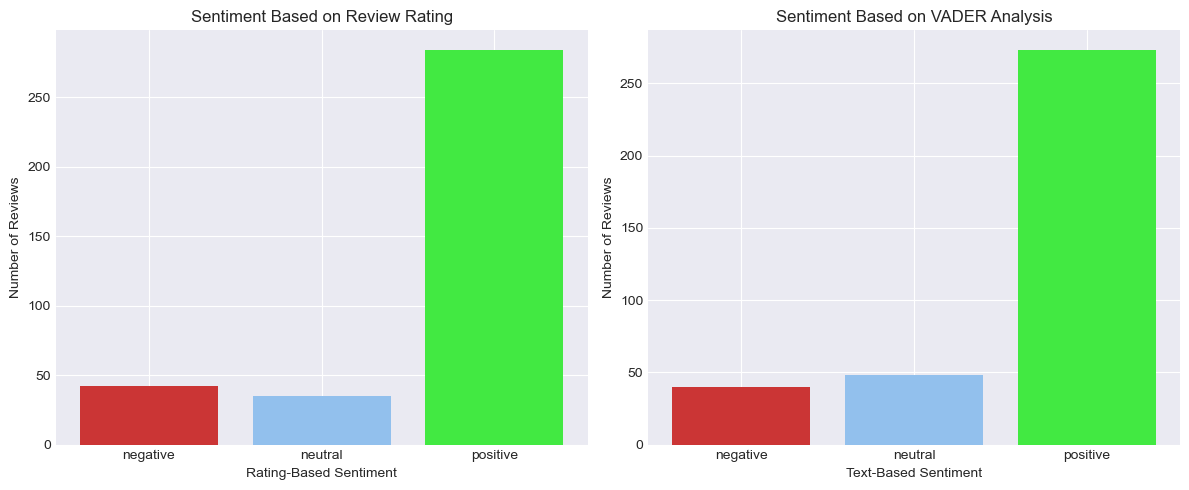

In [32]:
# Map ratings to sentiment
def rating_to_sentiment(rating):
    if rating in [1, 2]:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    elif rating in [4, 5]:
        return 'positive'

vader_data['rating_sentiment'] = vader_data['rating'].apply(rating_to_sentiment)

# Count values
rating_counts = vader_data['rating_sentiment'].value_counts().sort_index()
sentiment_counts = vader_data['vader_sentiment'].value_counts().sort_index()

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Rating-based sentiment plot
axes[0].bar(rating_counts.index, rating_counts.values, color=["#cb3535","#92c0ed","#42e942"])
axes[0].set_title('Sentiment Based on Review Rating')
axes[0].set_xlabel('Rating-Based Sentiment')
axes[0].set_ylabel('Number of Reviews')

# NLP sentiment plot
axes[1].bar(sentiment_counts.index, sentiment_counts.values, color=["#cb3535",'#92c0ed','#42e942'])
axes[1].set_title('Sentiment Based on VADER Analysis')
axes[1].set_xlabel('Text-Based Sentiment')
axes[1].set_ylabel('Number of Reviews')

plt.tight_layout()
plt.show()

- The plots above show that there's consistency in the reviews, mostly the ones with positive sentiments. 

- The negative sentiments remain under 50, but there is a sligt decrease in the VADER chart, indicating that there are some reviews that may have been underselling.

- In the two charts we see major differences in the negative and neutral bars. Where as in the rating sentiments negative reviews are more than the neutral ones, in the VADER sentiments, the opposite is observed.

## **Evaluation**: *TextBlob vs VADER vs Rating Sentiments*
In this section, we are going to evaluate the models used in the sentiment analysis to find the most accurate one to help us answer our question.

We have used:
- TextBlob to calculate polarity (how positive or negative a review is).

- VADER to calculate how positive or negative a text is.

After that we added sentiment label columns; positive, negative and neutral. This was crucial as the ratings do not always tell the whole story, we have reviews saying, *Delivery took forever, the product is okay but not as advertised.* and has a 5 start rating. It sounds positive but the sentiment analysis actually reveals the true feelings behind the words.

So here we are comparing the two based on manual investigation and alignment between rating based sentiments and the models' respective sentiments.

### Combine VADER and TextBlob datasets
For our analysis we used different datasets, so here we are combining them.

In [33]:
# Extract relevant columns
vader_sentiments = vader_data[['full_review', 'rating', 'vader_sentiment', 'rating_sentiment']]
textblob_sentiments = reviews['sentiment_label']

# Combine the columns
combined = pd.concat([vader_sentiments, textblob_sentiments], axis= 1)

# Preview
combined.head()

,full_review,rating,vader_sentiment,rating_sentiment,sentiment_label
0,big size not cotton Not cotton,1.0,neutral,negative,neutral
1,Not satisfied The material is bad.not what I e...,1.0,negative,negative,negative
2,I like it It is okay,5.0,positive,positive,positive
3,I like it The quality is good. It's worth the ...,5.0,positive,positive,positive
4,good Good,5.0,positive,positive,positive


Add columns to help us identify agreement/disparity

In [34]:
# Make three new columns that show whether the tools agree with the rating
combined['vader_match'] = combined['vader_sentiment'] == combined['rating_sentiment']
combined['textblob_match'] = combined['sentiment_label'] == combined['rating_sentiment']
combined['both_tools_agree'] = combined['vader_sentiment'] == combined['sentiment_label']

# Preview
combined.head()

,full_review,rating,vader_sentiment,rating_sentiment,sentiment_label,vader_match,textblob_match,both_tools_agree
0,big size not cotton Not cotton,1.0,neutral,negative,neutral,False,False,True
1,Not satisfied The material is bad.not what I e...,1.0,negative,negative,negative,True,True,True
2,I like it It is okay,5.0,positive,positive,positive,True,True,True
3,I like it The quality is good. It's worth the ...,5.0,positive,positive,positive,True,True,True
4,good Good,5.0,positive,positive,positive,True,True,True


### Overall agreement with ratings
We are checking to see how well the sentiment tools align with the star ratings.

In [35]:
# Calculate VADER and TextBlob accuracies
vader_accuracy = combined['vader_match'].mean()
textblob_accuracy = combined['textblob_match'].mean()

# Display results
vader_accuracy, textblob_accuracy

(np.float64(0.775623268698061), np.float64(0.628808864265928))

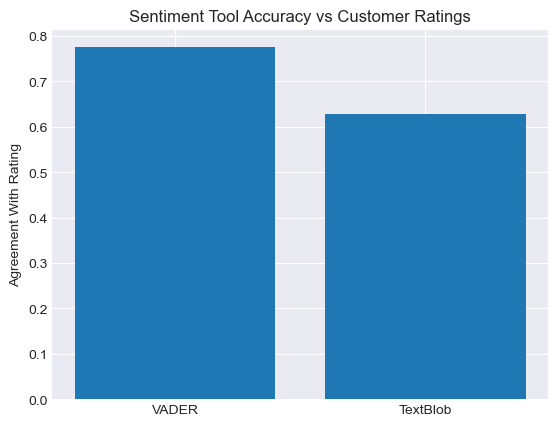

In [36]:
accuracies = [vader_accuracy, textblob_accuracy]
labels = ['VADER', 'TextBlob']

plt.bar(labels, accuracies)
plt.ylabel("Agreement With Rating")
plt.title("Sentiment Tool Accuracy vs Customer Ratings")
plt.show()

| Tool         | Agreement With Ratings |
| ------------ | ---------------------- |
| **VADER**    | **77.56%**             |
| **TextBlob** | **62.88%**             |

- VADER significantly outperformed TextBlob, correctly matching customer ratings 77.5% of the time. While TextBlob lagged behind at 62.9%, suggesting it struggles more with the informal, short, and sometimes sarcastic nature of ecommerce reviews.

- This result aligns with expectations: VADER is optimized for social-style, opinion-heavy text, while TextBlob is better suited for more formal writing.

### Agreement between VADER and TextBlob
We are now checking reviews that match between VADER and TextBlob

In [37]:
# Calculate how much the two tools agree
tools_agreement = combined['both_tools_agree'].mean()

# Display results
tools_agreement

np.float64(0.6869806094182825)

The two tools only agreed on sentiment around 69% of the time, which shows that:

- Sentiment analysis tools interpret the same review very differently. Ecommerce reviews, often short, emotional, or written in Kenyan English, are challenging for lexicon-based sentiment models.

- This strengthens the need to compare multiple tools rather than trusting a single system blindly.

### Breakdown by rating category

In [38]:
# Group by rating-based sentiments
rating_group = combined.groupby('rating_sentiment')[['vader_match', 'textblob_match']].mean()

# Display results
rating_group

,vader_match,textblob_match
rating_sentiment,,
negative,0.642857,0.380952
neutral,0.228571,0.228571
positive,0.862676,0.714789


| Rating Sentiment | VADER Match | TextBlob Match |
| ---------------- | ----------- | -------------- |
| **Negative**     | 64.29%      | 38.09%         |
| **Neutral**      | 22.86%      | 22.86%         |
| **Positive**     | 86.27%      | 71.48%         |

Key Insights:
1. Positive reviews were easiest for both tools

- VADER: 86.27% accuracy

- TextBlob: 71.48% accuracy

Most positive reviews are straightforward (e.g., “Good product”, “Works well”), making them easier to analyze.

2. Negative reviews were harder

- VADER: 64.29%

- TextBlob: 38.09%

Negative reviews often contain sarcasm, mixed feelings (“Product works but delivery was terrible”), local slang or informal grammar, factors that often confuse rule-based sentiment tools, especially TextBlob.

3. Neutral reviews were the most challenging

- VADER: 22.86%

- TextBlob: 22.86%

Neutral (3-star) reviews tend to contain balanced opinions, and both positive and negative comments, example:

"The product is okay but the delivery took too long."

Lexicon-based tools struggle with mixed sentiment and tend to force a polarity (positive or negative) even when the review is truly neutral.

### Mismatches and Consistencies
We've already established that we have inconsistencies in sentiments produced by the diffrenet tools, here we are displaying the reviews plus their respective sentiments produced by the different tools.

In [39]:
vader_mismatches = combined[combined['vader_match'] == False][['full_review','rating_sentiment','vader_sentiment']]
vader_mismatches

,full_review,rating_sentiment,vader_sentiment
0,big size not cotton Not cotton,negative,neutral
8,ok Ok,neutral,positive
15,could change please change the plugs very weak...,neutral,positive
17,its faster Faster,positive,neutral
18,stick it together Adding the power cord,positive,neutral
...,...,...,...
340,I didn't expect this It does have the header ...,negative,positive
346,Not as Powerful It's okay for drying but not s...,neutral,negative
349,I LIKE IT ITS OWESOME.IS THERE A SILENT ONE?,negative,positive
350,"Hair Clipper Works well, though the best the b...",neutral,positive


In [40]:
textblob_mismatches = combined[combined['textblob_match'] == False][['full_review','rating_sentiment','sentiment_label']]
textblob_mismatches

,full_review,rating_sentiment,sentiment_label
0,big size not cotton Not cotton,negative,neutral
5,quality of the fabric is poor The size is extr...,negative,positive
8,ok Ok,neutral,positive
14,It's awesome Most affordable electric kettle??...,positive,neutral
15,could change please change the plugs very weak...,neutral,negative
...,...,...,...
346,Not as Powerful It's okay for drying but not s...,neutral,positive
349,I LIKE IT ITS OWESOME.IS THERE A SILENT ONE?,negative,neutral
350,"Hair Clipper Works well, though the best the b...",neutral,positive
353,good Battery ???? last for 2 hrs,positive,neutral


In [41]:
consistent_both = combined[(combined['vader_match'] == False) & (combined['textblob_match'] == False)]
consistent_both

,full_review,rating,vader_sentiment,rating_sentiment,sentiment_label,vader_match,textblob_match,both_tools_agree
0,big size not cotton Not cotton,1.0,neutral,negative,neutral,False,False,True
8,ok Ok,3.0,positive,neutral,positive,False,False,True
15,could change please change the plugs very weak...,3.0,positive,neutral,negative,False,False,False
17,its faster Faster,5.0,neutral,positive,neutral,False,False,True
18,stick it together Adding the power cord,4.0,neutral,positive,neutral,False,False,True
20,average it's okay for the price,3.0,positive,neutral,positive,False,False,True
25,wrong order I ordered a black one but didn't g...,3.0,negative,neutral,negative,False,False,True
31,Trouser Somehow better,3.0,positive,neutral,positive,False,False,True
34,sub standard It's not of quality,1.0,neutral,negative,neutral,False,False,True
39,Very Comfortable It's comfortable while wearin...,3.0,positive,neutral,positive,False,False,True


This is to help you understand what type of reviews often mismatched or aligned.

### 

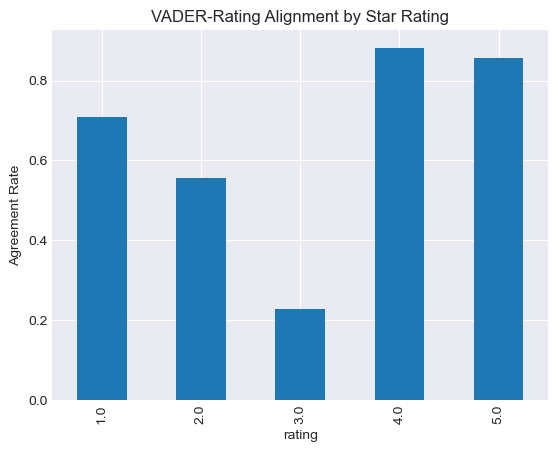

In [42]:
combined['vader_match_numeric'] = combined['vader_match'].astype(int)

combined.groupby('rating')['vader_match_numeric'].mean().plot(kind='bar')
plt.title("VADER-Rating Alignment by Star Rating")
plt.ylabel("Agreement Rate")
plt.show()


- Positive reviews (4–5 stars) are the most consistent and reliable.

- Negative reviews (1–2 stars) are somewhat reliable but still have noise.

- 3-star reviews are highly inconsistent and unreliable indicators of sentiment.

This finding supports the conclusion that ratings alone do not fully capture customer experience, especially in borderline cases.


### Overall Evaluation Conclusion

- VADER is the more reliable tool for Jumia-style ecommerce reviews.

- TextBlob underperforms, especially for negative and mixed reviews.

- Both tools struggle with neutral reviews, suggesting ecommerce platforms may need more sophisticated models (or domain-specific lexicons) to understand customer feedback accurately.

These results highlight that ratings and written reviews do not always tell the same story, and relying solely on one can lead to misleading conclusions.

## **Additional Exploratory Analysis**

### Overall Sentiment Breakdown.
We have successfully done our sentiment analysis and now we are checking the overall sentiment breakdown, to understand the distribution of positive, negative and neutral reviews in the dataset.

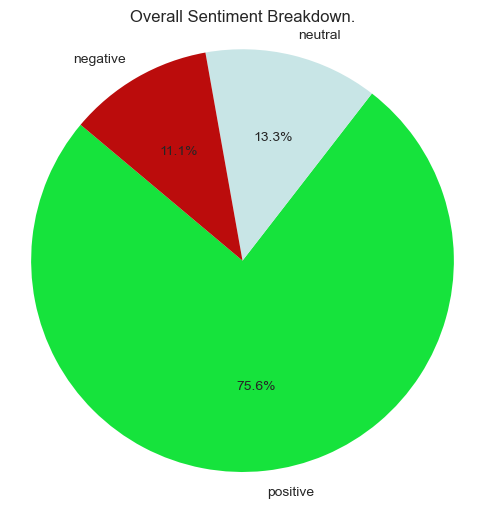

In [43]:
# Prepare data for plotting.
sentiment_counts = vader_data['vader_sentiment'].value_counts()

# Set pie-plot colors.
colors = ["#16e33c", "#c8e5e6", "#bb0c0c"]

# Plot overall sentiment breakdown.
plt.figure(figsize= (6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors , startangle=140)
plt.title('Overall Sentiment Breakdown.')
plt.axis('equal')
plt.show()

Positive reviews still dominate the distribution just as 5 star reviews dominated the review ratings. Closely followed by the neutral sentiments. The distribution, however has tweaked in the 2nd and 3rd positions as neutral and negative switch places.

### Sentiment by Product Category.
During our EDA, we found that electronics like computing and gaming devices, tvs and audios and appliances had the most positive review ratings, here we are trying to identify if the same categories still have the positive review sentiments.

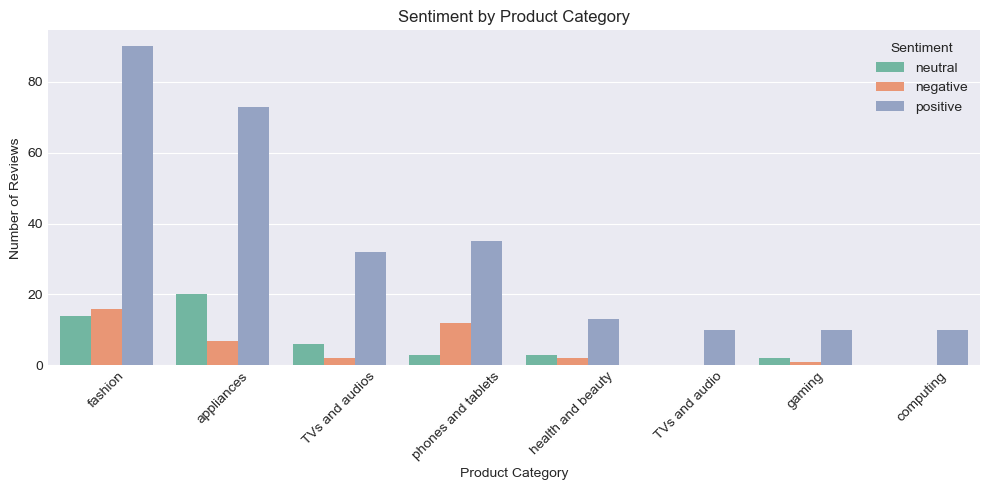

In [44]:
# Plot Sentiment by Product Category.
plt.figure(figsize=(10,5))
sns.countplot(data= vader_data, x='category', hue= 'vader_sentiment', palette='Set2')
plt.title('Sentiment by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation= 45)
plt.legend(title= 'Sentiment')
plt.tight_layout()
plt.show()

- Fashion has the most positive sentiments, followed closely by appliances then phones and tablets.

- Appliances has the most neutral sentiments, followed by fashion and TVs and audios.

- Fashion also has the most negative sentiments, followed by  phones and tablets then appliances.

### Sentiment by Verified purchases only.
We are looking to uncover the distribution of the sentiments in verified purchases.

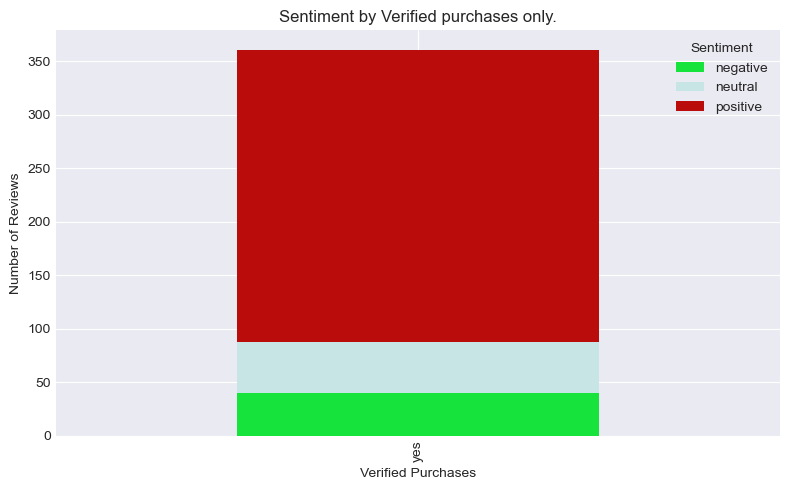

In [45]:
# Prepare data for plotting.
verified_sentiment = pd.crosstab(vader_data['verified'], vader_data['vader_sentiment'])

# Plot sentiments by Verified purchases only.
verified_sentiment.plot.bar(stacked= True, color=colors, figsize= (8,5))
plt.title('Sentiment by Verified purchases only.')
plt.xlabel('Verified Purchases')
plt.ylabel('Number of Reviews')
plt.legend(title= 'Sentiment')
plt.tight_layout()
plt.show()

## **Final Analysis**
In this section, we are going to do the final analysis and actually use the dataset to answer the question stated in the problem statement.

#### Are online reviews reliable?
There have been several articles in the internet stating that vendors in online platforms are using fake reviews to boost their sales and visibility. After collecting the data, cleaning it, engineering some new columns and performing sentiment analysis on it, we are now going to compare the data before NPL and after to find out if Jumia Kenya e-commerce platform has fake or unreliable reviews.

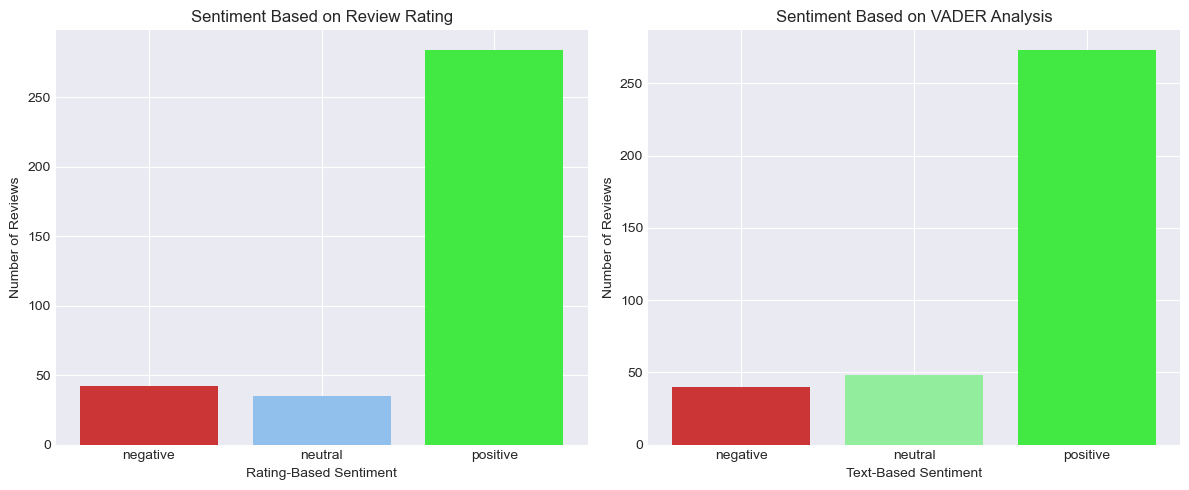

In [46]:
# Map ratings to sentiment
def rating_to_sentiment(rating):
    if rating in [1, 2]:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    elif rating in [4, 5]:
        return 'positive'

vader_data['rating_sentiment'] = vader_data['rating'].apply(rating_to_sentiment)

# Count values
rating_counts = vader_data['rating_sentiment'].value_counts().sort_index()
sentiment_counts = vader_data['vader_sentiment'].value_counts().sort_index()

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Rating-based sentiment plot
axes[0].bar(rating_counts.index, rating_counts.values, color=["#cb3535","#92c0ed","#42e942"])
axes[0].set_title('Sentiment Based on Review Rating')
axes[0].set_xlabel('Rating-Based Sentiment')
axes[0].set_ylabel('Number of Reviews')

# NLP sentiment plot
axes[1].bar(sentiment_counts.index, sentiment_counts.values, color=["#cb3535","#92ED9D",'#42e942'])
axes[1].set_title('Sentiment Based on VADER Analysis')
axes[1].set_xlabel('Text-Based Sentiment')
axes[1].set_ylabel('Number of Reviews')

plt.tight_layout()
plt.show()

- The plots above show that there's consistency in the reviews, mostly the ones with positive sentiments. 

- The negative sentiments remain under 50, but there is a sligt decrease in the VADER chart, indicating that there are some reviews that may have been underselling.

- In the two charts we see major differences in the negative and neutral bars. Where as in the rating sentiments negative reviews are more than the neutral ones, in the VADER sentiments, the opposite is observed.

In [47]:
# Saving final dataset for Power BI dashboard.
vader_data.to_csv('../Data/CleanedData/dashboard_dataset.csv', index= False)

## **Conclusion**
The purpose of this analysis was to determine whether star ratings on Jumia Kenya are trustworthy indicators of customer sentiment and whether written reviews match the emotion implied by the rating. To evaluate this, we compared each review’s star rating with its sentiment score from the VADER model.

The results show that most customers are consistent:

- 1-star, 2-star, 4-star, and 5-star reviews have strong alignment between the written sentiment and the given rating. This means that when customers feel strongly, positively or negatively, their written reviews clearly support the rating they choose.

- However, 3-star reviews show very low alignment, indicating that customers often use the 3-star rating for mixed or uncertain experiences that are harder to capture with sentiment analysis. The written text may contain both positive and negative elements, making the sentiment appear neutral even when the rating doesn’t perfectly match.

Overall, this analysis suggests that star ratings are largely reliable, especially at the extremes. Customers who feel very satisfied or very dissatisfied tend to express that emotion both in their rating and in their review text. The only area of uncertainty is 3-star reviews, which appear to be less predictable and may not reliably represent a clear sentiment.

While this outcome contrasts with our early hypothesis, it highlights an encouraging trend: verified customers on Jumia Kenya appear to have largely positive experiences, particularly in the Fashion and Appliances categories.

Rather than uncovering widespread sentiment manipulation, this analysis instead confirms the *validity and reliability of verified customer feedback* within this dataset.

## **Limitations**
While the results are meaningful, several limitations affect the certainty of our conclusions:

1. *Sentiment models (VADER/TextBlob) are not perfect*

- We observed multiple cases where the tool classified a clearly negative comment as positive, and neutral reviews were interpreted as negative or vice versa.

- This shows that the sentiment tools are not 100% accurate, especially with Kenyan English variations, sarcastic remarks, very short reviews or context-heavy complaints.

Because of this, the alignment percentages we calculated may not perfectly represent true customer sentiment.

2. *Reviews may contain mixed emotions*

- A review can say something like, “Good product but poor delivery.”

A single sentiment score cannot fully capture mixed emotions, which especially affects 3-star ratings, where customers tend to be conflicted.

3. *Short reviews reduce accuracy*

Reviews like “Good”, “Poor”, “Nice”, or “Bad” often lack context. Sentiment models may give overly simplistic scores that don’t reflect what the customer truly felt.

4. *Not all reviewers follow rating rules*

Some customers give 5 stars but complain in the text, 1 star but write a positive review, neutral text with extreme ratings. Human behavior can be inconsistent, which affects trust in the rating system.

## **Future Improvements.**
- Expand to other online platforms (Kilimall, PigiaMe, etc.)

- Integrate other features such as pricing, and location.
